In [1]:
import tensorflow as tf
import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.text import Tokenizer 

def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(9, 9))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(9)), labels=classes)
    plt.yticks(list(range(9)), labels=classes)
    plt.colorbar(ctx)
    plt.show()
    return len(set(y_true))
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.7.0


In [2]:
!pip install datasets

In [3]:
from datasets import load_dataset

emotion_dataset = load_dataset("emotion")

Using custom data configuration default
Reusing dataset emotion (C:\Users\valsa\.cache\huggingface\datasets\emotion\default\0.0.0\348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
emotion_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
emotion_train = emotion_dataset['train']
print(emotion_train[0])
print(emotion_train.column_names)
print(emotion_train.features)

{'text': 'i didnt feel humiliated', 'label': 0}
['text', 'label']
{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)}


In [6]:
emotion_dataset.set_format(type="pandas")
df1 = emotion_dataset["train"][:]
test = emotion_dataset["test"][:]
val = emotion_dataset["validation"][:]

In [7]:
df1 = df1.rename(columns={'text':'sentence','label':'emotion'})

In [8]:
df1.head()

,sentence,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [9]:
df1 = df1[["emotion", "sentence"]]

In [10]:
df1.head()

,emotion,sentence
0,0,i didnt feel humiliated
1,0,i can go from feeling so hopeless to so damned...
2,3,im grabbing a minute to post i feel greedy wrong
3,2,i am ever feeling nostalgic about the fireplac...
4,3,i am feeling grouchy


In [11]:
df1.emotion.unique()

array([0, 3, 2, 5, 4, 1], dtype=int64)

In [12]:
df1 = df1.replace([0,1,2,3,4,5],['sadness','joy','love','anger','fear','surprise'])
df1.head()

,emotion,sentence
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,anger,i am feeling grouchy


In [13]:
df2 = pd.read_csv('G:\My Drive\AnjanaValsalan_ECNG 3020\Implementation Files\ISEAR csv\ISEAR.csv')

In [14]:
df2.head()

,emotion,sentence,Unnamed: 2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [15]:
df2.dropna(axis=1, how="any", thresh=None, subset=None, inplace=True)

In [16]:
df2.head()

,emotion,sentence
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [17]:
frames = [df1, df2]

In [18]:
df = pd.concat(frames)

In [19]:
df.reset_index(drop=True)

,emotion,sentence
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,anger,i am feeling grouchy
...,...,...
23511,shame,Two years back someone invited me to be the tu...
23512,shame,I had taken the responsibility to do something...
23513,fear,I was at home and I heard a loud sound of spit...
23514,guilt,I did not do the homework that the teacher had...


In [20]:
text = df.drop(columns = ['emotion']).copy()
label = df['emotion']

text_list = text.values.tolist()

In [21]:
label_list = label.values.tolist()

In [22]:
rand = np.random.RandomState(32).permutation(len(label_list))

In [23]:
text_array = np.array(text)[rand]

In [24]:
label_array = np.array(label)[rand]

In [25]:
text_train = text_array[0: int(0.8*len(text_array))]

In [26]:
label_train = label_array[0: int(0.8*len(label_array))]

In [27]:
i = 53
text_train[i]

array(['Once in primary five, I had forgotten to take a book to class and  \nthe teacher punished me by asking me to stand at the back of the  \nclass.  I thought about the way my mother would react if she saw  \nme being punished.  My mother was very good to me and though she  \ndid not see me punished, I felt sorry for her.'],
      dtype=object)

In [28]:
label_train[i]

'shame'

In [29]:
text_val = text_array[int(0.8*len(text_array)):]

In [30]:
label_val = label_array[int(0.8*len(label_array)):]

In [31]:
text_val[i]

array(['i keep feeling that im unloved unwanted unimportant in everyones eyes at all'],
      dtype=object)

In [32]:
label_val[i]

'sadness'

In [33]:
text_train_list=[ i[0] for i in text_train.tolist()]

In [34]:
label_train_list=[ i[0] for i in label_train.tolist()]

In [35]:
text_val_list=[ i[0] for i in text_val.tolist()]

In [36]:
label_val_list=[ i[0] for i in label_val.tolist()]

In [37]:
tokenizer = Tokenizer(num_words=1000000, oov_token='<UNK>')
tokenizer.fit_on_texts([text_train_list[1]])

In [38]:
tokenizer.texts_to_sequences([text_train_list[1]])

[[2, 4, 5, 6, 7, 3, 3, 8, 9, 10, 11, 12, 13, 2, 14, 15, 16]]

In [39]:
text_train_list[1]

'i went for the large double double along with a chocolate chip muffin i was feeling dangerous'

<function matplotlib.pyplot.show(close=None, block=None)>

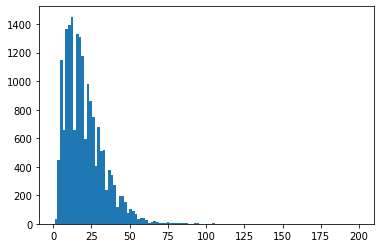

In [40]:
lengths = [len(t.split(' ')) for t in text_train_list]
plt.hist(lengths, bins = len(set(lengths)))
plt.show

In [41]:
max_length = 125
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
def get_sequences(tokenizer, text_train_list):
    sequences = tokenizer.texts_to_sequences(text_train_list)
    padded = pad_sequences(sequences, truncating='post', padding='post', maxlen = max_length)
    return padded

In [43]:
padded_train_seq = get_sequences(tokenizer,text_train_list)

In [44]:
padded_train_seq

array([[2, 1, 1, ..., 0, 0, 0],
       [2, 4, 5, ..., 0, 0, 0],
       [2, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 2, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [2, 1, 1, ..., 0, 0, 0]])

In [45]:
classes = set(label_train)
print(classes)

{'anger', 'fear', 'shame', 'guilt', 'love', 'surprise', 'joy', 'sadness', 'disgust'}


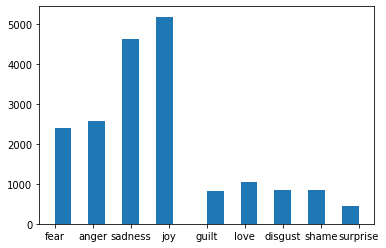

In [46]:
plt.hist(label_train, bins=18)
plt.show()

In [47]:
class_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in class_to_index.items())

In [48]:
class_to_index

{'anger': 0,
 'fear': 1,
 'shame': 2,
 'guilt': 3,
 'love': 4,
 'surprise': 5,
 'joy': 6,
 'sadness': 7,
 'disgust': 8}

In [49]:
index_to_class

{0: 'anger',
 1: 'fear',
 2: 'shame',
 3: 'guilt',
 4: 'love',
 5: 'surprise',
 6: 'joy',
 7: 'sadness',
 8: 'disgust'}

In [50]:
names_to_ids = lambda label_train: np.array([class_to_index.get(x) for x in label_train])

In [51]:
train_labels = names_to_ids(label_train)
print(train_labels[0])

1


In [52]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(23516, 16, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(9, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = optimizer,
    metrics=['accuracy']
)

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 125, 16)           376256    
                                                                 
 bidirectional (Bidirectiona  (None, 125, 40)          5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 9)                 369       
                                                                 
Total params: 392,305
Trainable params: 392,305
Non-trainable params: 0
_________________________________________________________________


In [54]:
text_val_list=[ i[0] for i in text_val.tolist()]

In [55]:
text_val_seq = get_sequences(tokenizer, text_val_list)

In [56]:
text_val_seq

array([[ 2,  1,  1, ...,  0,  0,  0],
       [ 1, 15,  1, ...,  0,  0,  0],
       [ 2,  1,  1, ...,  0,  0,  0],
       ...,
       [ 2,  1,  1, ...,  0,  0,  0],
       [ 2,  1,  1, ...,  0,  0,  0],
       [ 2,  1,  1, ...,  0,  0,  0]])

In [57]:
train_labels

array([1, 0, 7, ..., 3, 0, 7])

In [58]:
label_val = names_to_ids(label_val)

In [59]:
label_val

array([7, 5, 4, ..., 6, 7, 7])

In [60]:
h = model.fit(
padded_train_seq, train_labels,
validation_data=(text_val_seq, label_val),
batch_size = 200,
epochs=100,
callbacks=[
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 10)
])

Epoch 1/100
95/95 [==============================] - 21s 174ms/step - loss: 1.9505 - accuracy: 0.2690 - val_loss: 1.9224 - val_accuracy: 0.2713
Epoch 2/100
95/95 [==============================] - 15s 158ms/step - loss: 1.8931 - accuracy: 0.2801 - val_loss: 1.8944 - val_accuracy: 0.2736
Epoch 3/100
95/95 [==============================] - 16s 164ms/step - loss: 1.8459 - accuracy: 0.2830 - val_loss: 1.8434 - val_accuracy: 0.2802
Epoch 4/100
95/95 [==============================] - 15s 160ms/step - loss: 1.8183 - accuracy: 0.2881 - val_loss: 1.8270 - val_accuracy: 0.2785
Epoch 5/100
95/95 [==============================] - 16s 166ms/step - loss: 1.8041 - accuracy: 0.2951 - val_loss: 1.8166 - val_accuracy: 0.2893
Epoch 6/100
95/95 [==============================] - 16s 169ms/step - loss: 1.7937 - accuracy: 0.2928 - val_loss: 1.8111 - val_accuracy: 0.2929
Epoch 7/100
95/95 [==============================] - 15s 156ms/step - loss: 1.7877 - accuracy: 0.2926 - val_loss: 1.7966 - val_accuracy:

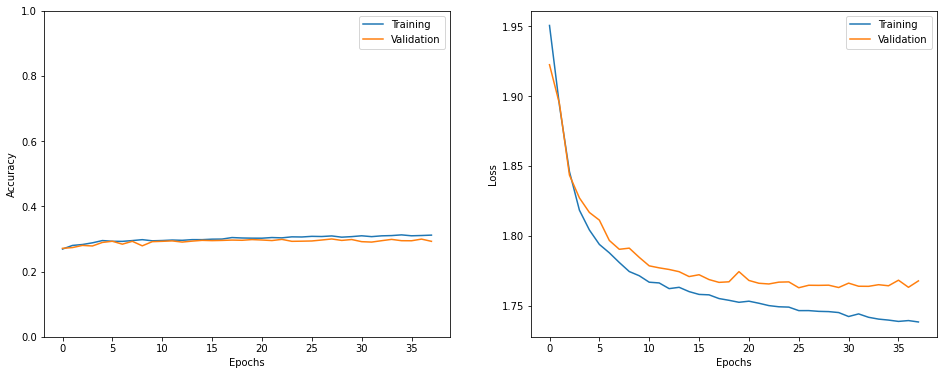

In [61]:
show_history(h)

In [62]:
test = test.rename(columns={'text':'sentence','label':'emotion'})

In [63]:
test = test[["emotion", "sentence"]]

In [64]:
test = test.replace([0,1,2,3,4,5],['sadness','joy','love','anger','fear','surprise'])

In [65]:
text_test = test.drop(columns = ['emotion']).copy()
label_test = test['emotion']

text_test_list = text_test.values.tolist()

In [66]:
label_test_list = label_test.values.tolist()

In [67]:
test_seq = get_sequences(tokenizer, text_test_list)
test_labels = names_to_ids(label_test_list)

In [68]:
print(type(test_seq))

<class 'numpy.ndarray'>


In [69]:
_=model.evaluate(test_seq, test_labels)

63/63 [==============================] - 1s 16ms/step - loss: 2.1208 - accuracy: 0.2905


In [70]:
i = random.randint(0, len(test_labels) - 1)

print('Sentence:', text_test_list[i])
print('Emotion:', index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]

print('Predicted Emotion:', pred_class)

Sentence: ['im okay with her getting married whirlwind style at the courthouse and going off to kentucky to live with him but im still feeling hurt by the betrayal and secretive style she had adopted']
Emotion: sadness
Predicted Emotion: sadness


In [71]:
preds = np.argmax(model.predict(test_seq), axis=-1)

In [72]:
preds[1]

7

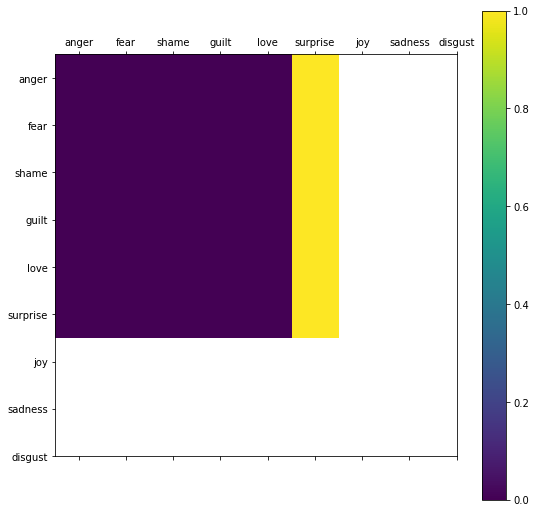

6

In [73]:
show_confusion_matrix(test_labels, preds, list(classes))

In [74]:
set(preds)

{7}